# Deep learning classifiers for urban sound data - Project Machine Learning II

## Índice
1. Imports and Setup
2. Data pre-processing and preparation
3. Model architecture definition
4. Training strategies
5. Performance evaluation 

#### 1. Import and Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Data pre-processing and preparation

The fisrt step is to load and analyse the dataset containing the metedata of the urban sounds.

In [10]:
# Load the dataset metadata
df = pd.read_csv('./UrbanSound8K/metadata/UrbanSound8K.csv')
print("The dataset contains:", df.shape, "rows and columns.") 
df.head()

The dataset contains: (8732, 8) rows and columns.


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


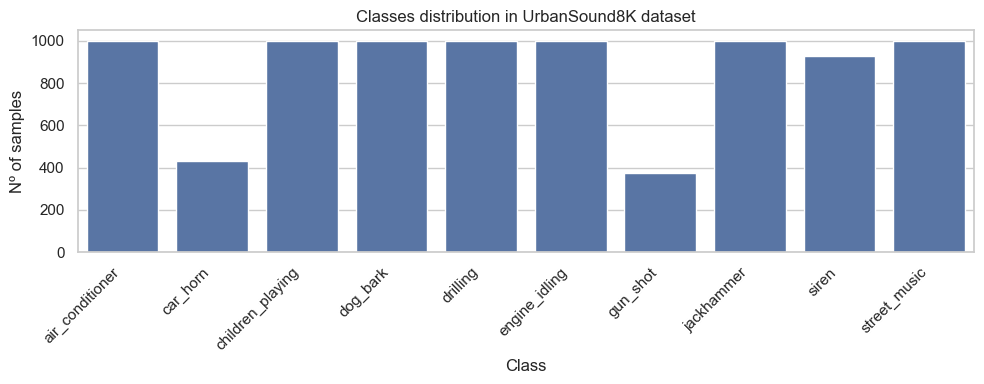

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df, x="class", order=sorted(df["class"].unique()))
ax.set_title("Classes distribution in UrbanSound8K dataset")
ax.set_xlabel("Class"); ax.set_ylabel("Nº of samples")
plt.xticks(rotation=45, ha="right"); plt.tight_layout()
plt.show()

While most classes include around 1,000 samples, car_horn and gun_shot are clear outliers, with only about 400 samples each. This pronounced underrepresentation creates a class imbalance that can negatively influence model performance.

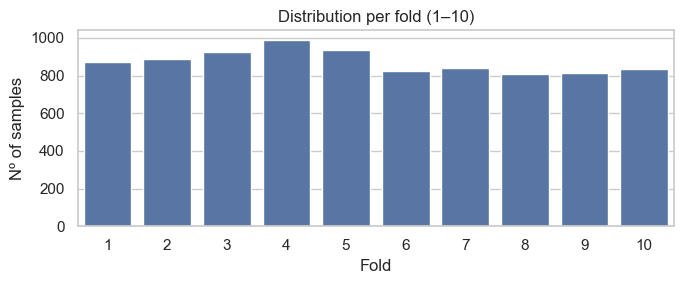

classID  class           
0        air_conditioner     1000
1        car_horn             429
2        children_playing    1000
3        dog_bark            1000
4        drilling            1000
5        engine_idling       1000
6        gun_shot             374
7        jackhammer          1000
8        siren                929
9        street_music        1000
Name: count, dtype: int64


In [14]:
plt.figure(figsize=(7,3))
ax = sns.countplot(data=df, x="fold", order=sorted(df["fold"].unique()))
ax.set_title("Distribution per fold (1–10)")
ax.set_xlabel("Fold"); ax.set_ylabel("Nº of samples")
plt.tight_layout(); plt.show()

print(df.groupby(["classID","class"]).size().rename("count"))

The figure shows the number of audio samples in each of the 10 predefined folds of the UrbanSound8K dataset. Although the folds are not perfectly uniform in size, each contains between 800 and 1,000 samples, ensuring a reasonably balanced 10-fold cross-validation split.

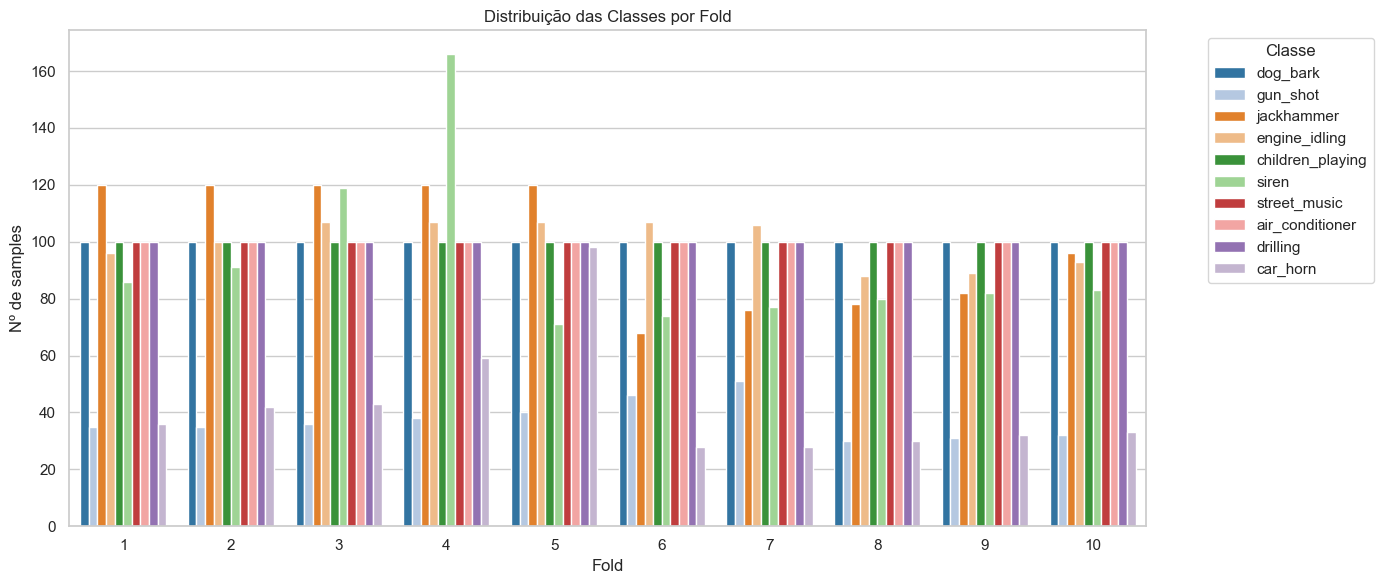

In [16]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="fold", hue="class", palette="tab20")
plt.title("Distribuição das Classes por Fold")
plt.xlabel("Fold")
plt.ylabel("Nº de samples")
plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


From the graphic we can observe that, as expected, most classes are evenly distributed across the 10 folds. Classes with approximately 1,000 samples in the original dataset appear with around 100 samples per fold, showing a stable and balanced split.

However, some classes present noticeable deviations: “siren”, “jackhammer”, and “engine_idling” show moderate oscillations across folds, with certain folds containing visibly more samples than others (e.g., fold 4 for siren). The under-represented classes “car_horn” and “gun_shot” exhibit stronger variability, especially car_horn, whose number of samples fluctuates substantially between folds.

These discrepancies are inherent to the original UrbanSound8K partitioning and should be considered during model evaluation, since folds with fewer samples from minority classes may lead to higher variance in test performance.

Perguntei ao professor e ele disse que de facto este é um problema que ainda está aberto na área e que podemos meter na conslusão que de facto o modelo tem uma pior performance nas classes com menos representação e que future work seria usar estratégias como SMOTE para class imbalance.
